In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [47]:
data = load_iris()
X, y = data.data, data.target

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

([<matplotlib.axis.XTick at 0x1c5ed6c4880>,
 [Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')])

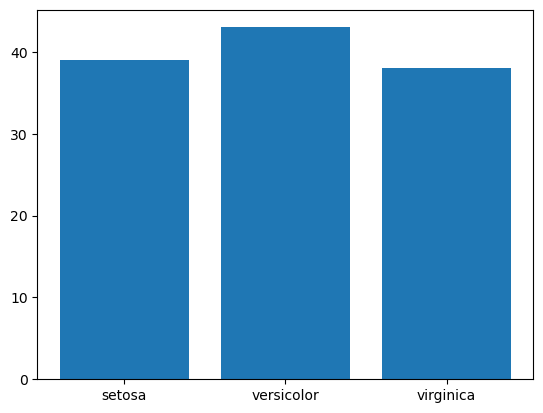

In [48]:
import numpy as np
import matplotlib.pyplot as plt

counts = np.bincount(y_train)
positions = np.arange(3)

plt.bar(positions, counts)
plt.xticks(positions, data.target_names)

([<matplotlib.axis.XTick at 0x1c5ed672c50>,
 [Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')])

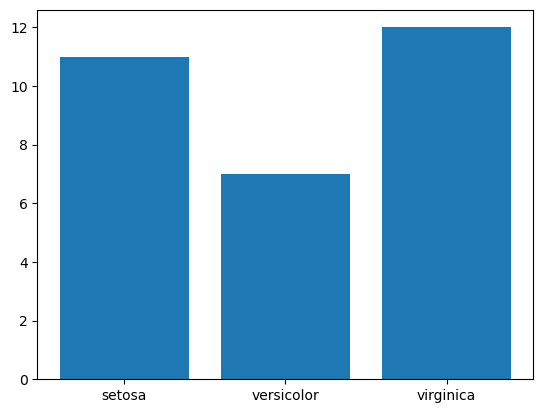

In [49]:
import numpy as np
import matplotlib.pyplot as plt

counts = np.bincount(y_test)
positions = np.arange(3)

plt.bar(positions, counts)
plt.xticks(positions, data.target_names)

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_idx, test_idx in split.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]